In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import locale
import seaborn as sns
from babel.numbers import format_currency
import numpy as np

locale.setlocale(locale.LC_ALL, '')

purchasers = pd.read_csv('purchaser.csv', parse_dates=['Date of Purchase'])
encashers = pd.read_csv('political_party.csv', parse_dates=['Date of Encashment'])

In [58]:
print(f"Total Number of Purchased Bonds: {purchasers.shape[0]}")
print(f"Total Number of Encashed  Bonds: {encashers.shape[0]}")
print(f"Missing from Purchased?: {encashers.shape[0] - purchasers.shape[0]}")
print(f"""Total Amount Purchased: {format_currency(purchasers['Denomination'].sum(),
                                                   "INR",
                                                   locale='en_IN')}
""")
print(f"""Total Amount Encashed: {format_currency(encashers['Denomination'].sum(),
                                                   "INR",
                                                   locale='en_IN')}
""")
print(f"""Total Unaccounted: {format_currency(encashers['Denomination'].sum() - purchasers['Denomination'].sum(),
                                                   "INR",
                                                   locale='en_IN')}
""")


Total Number of Purchased Bonds: 18871
Total Number of Encashed  Bonds: 20421
Missing from Purchased?: 1550
Total Amount Purchased: ₹1,21,55,51,32,000.00

Total Amount Encashed: ₹1,27,69,08,93,000.00

Total Unaccounted: ₹6,13,57,61,000.00



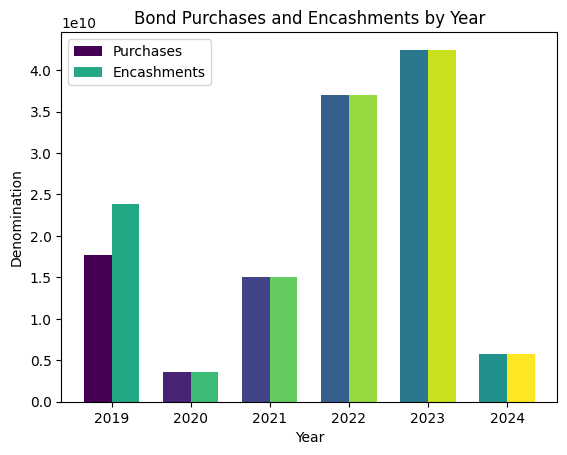

In [94]:
# Bond puchased by year

cmap = plt.get_cmap('viridis')
colors1 = cmap(np.linspace(0, .5, len(all_years)))
colors2 = cmap(np.linspace(.6, 1, len(all_years)))

purchasers['Year'] = purchasers['Date of Purchase'].dt.year
encashers['Year'] = encashers['Date of Encashment'].dt.year
purchasers['Month'] = purchasers['Date of Purchase'].dt.month
encashers['Month'] = encashers['Date of Encashment'].dt.month
purchases_by_year = purchasers.groupby('Year')['Denomination'].sum()
encashments_by_year = encashers.groupby('Year')['Denomination'].sum()
all_years = sorted(set(purchases_by_year.index) | set(encashments_by_year.index))
purchases_by_year = purchases_by_year.reindex(all_years, fill_value=0)
encashments_by_year = encashments_by_year.reindex(all_years, fill_value=0)

fig, ax = plt.subplots()
bar_width = 0.35
index = np.arange(len(all_years))

bars1 = ax.bar(index - bar_width/2, purchases_by_year, bar_width, label='Purchases', color=colors1)
bars2 = ax.bar(index + bar_width/2, encashments_by_year, bar_width, label='Encashments', color=colors2)

ax.set_xlabel('Year')
ax.set_ylabel('Denomination')
ax.set_title('Bond Purchases and Encashments by Year')
ax.set_xticks(index)
ax.set_xticklabels(all_years)
ax.legend()

plt.show()


In [95]:
# create a dataframe with denomination of 1 crore or above and frequency and sorted by dates
high_purchasers = purchasers[purchasers['Denomination'] >= 10000000]
high_encashers = encashers[encashers['Denomination'] >= 10000000]
high_purchase_count_df = high_purchasers.groupby(['Year', 'Month' ,'Purchaser Name'])['Denomination'].count().reset_index()
high_encasher_count_df = high_encashers.groupby(['Year', 'Month', 'Name of the Political Party'])['Denomination'].count().reset_index()

In [96]:
high_purchase_count_df

,Year,Month,Purchaser Name,Denomination
0,2019,4,ADIT BUILD WELL PVT LTD,1
1,2019,4,"AISHWARYA BUSINESS CORPORATION PVT, LTD",4
2,2019,4,ALOK NARAYAN PANDEY,3
3,2019,4,APOLLO TYRES LIMITED,3
4,2019,4,B2C CONSULTING LLP,1
...,...,...,...,...
1094,2024,1,VEDIKA VANIJYA PVT LTD-SELF A/C,5
1095,2024,1,VIHAAN AUTO VENTURES PRIVATE LIMITED,2
1096,2024,1,VIKAS PARASRAMPURIA,2
1097,2024,1,WESTERN UP POWER TRANSMISSION COMPANY LI MITED,30


In [125]:
def monthly_analysis(month, year):
    df1 = high_encasher_count_df[(high_encasher_count_df['Year'] == year) & (high_encasher_count_df['Month'] == month)].sort_values('Denomination', ascending=False)
    df2 = high_purchase_count_df[(high_purchase_count_df['Year'] == year) & (high_purchase_count_df['Month'] == month)].sort_values('Denomination', ascending=False)
    # just append the results columns wise without any join or index
    df = pd.concat([df1.reset_index(), df2.reset_index()], axis=1)
    df.columns = ['index', 'Year', 'Month', 'Political Party', 'encashed_amount (in Cr.)', 'Year', 'Month', 'Purchaser Name', 'purcahsed_amount (in Cr.)']
    return df

In [126]:
df = monthly_analysis(4, 2019)[:30]

ValueError: Length mismatch: Expected axis has 10 elements, new values have 9 elements

In [124]:
df.fillna(0, inplace=True)

,index,Year,Month,Name of the Political Party,Denomination,index,Year,Month,Purchaser Name,Denomination
0,3.0,2019.0,4.0,BHARTIYA JANTA PARTY,967.0,28,2019,4,MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED,65
1,6.0,2019.0,4.0,"PRESIDENT, ALL INDIA CONGRESS COMMITTEE",103.0,24,2019,4,KEVENTER FOODPARK INFRA LIMITED,55
2,2.0,2019.0,4.0,BHARAT RASHTRA SAMITHI,23.0,12,2019,4,ESSEL MINING AND INDS LTD,49
3,1.0,2019.0,4.0,ALL INDIA TRINAMOOL CONGRESS,15.0,37,2019,4,PHL FINIVEST PVT LTD,40
4,8.0,2019.0,4.0,SHIVSENA (POLITICAL PARTY),10.0,61,2019,4,VEDANTA LIMITED,39
5,5.0,2019.0,4.0,DMK PARTY IN PARLIAMENT,9.0,25,2019,4,LAKSHMI NIWAS MITTAL,35
6,10.0,2019.0,4.0,YSR CONGRESS PARTY (YUVAJANA SRAMIKA R,7.0,31,2019,4,NAVAYUGAENGINEERING COMPANY LIMITED,30
7,7.0,2019.0,4.0,SHIROMANI AKALI DAL,6.0,40,2019,4,PRL DEVELOPERS PRIVATE LIMITED,20
8,9.0,2019.0,4.0,TELUGU DESAM PARTY,6.0,6,2019,4,BAJAJ FINANCE LTD,20
9,0.0,2019.0,4.0,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,3.0,14,2019,4,FINOLEX CABLES LTD,20
